In [145]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
data_path= ("/Users/Fcue/fcue2/yelp_labelled.txt")

In [147]:
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)

In [148]:
yelp_raw.columns= ['feedback', 'score']

In [149]:
yelp_raw.head(200)
#based from UCI website, 1 is positive and 0 is negative

,feedback,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [150]:
yelp_raw['score'] = yelp_raw['score'].map({0: 'negative', 1: 'positive' })

In [151]:
yelp_raw.head()

,feedback,score
0,Wow... Loved this place.,positive
1,Crust is not good.,negative
2,Not tasty and the texture was just nasty.,negative
3,Stopped by during the late May bank holiday of...,positive
4,The selection on the menu was great and so wer...,positive


In [152]:
keywords = ['Wow', 'great', 'amazing', 'really good', 'friendly', 'delicious', 'terrific'  ]

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [142]:
#yelp_raw[yelp_raw.score == 1]= 'positive'
#yelp_raw[yelp_raw.score == 0]= 'negative'
yelp_raw['score'] = (yelp_raw['score'] == 'score')

In [118]:
#yelp_raw.loc[yelp_raw.score == 1] = 'positive'
#yelp_raw.loc[yelp_raw.score == 0] = 'negative'

In [141]:
#yelp_raw['score'] = (yelp_raw['score'] == 'score')
#yelp_raw

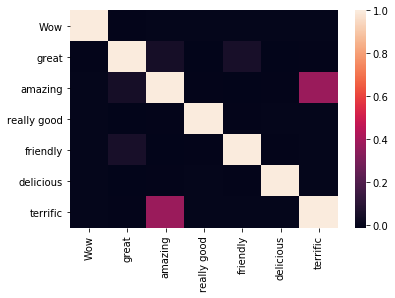

In [153]:
sns.heatmap(yelp_raw.corr())
plt.show()

In [154]:
data = yelp_raw[keywords]
target = yelp_raw['score']

In [155]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 437
